In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import pickle
import joblib
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("dataFinal.csv", delimiter=",")

In [3]:
df

,gender,age,education,work_status,injured_past_year,head_injury,chest_injury,back_injury,stomach_injury,upper_body_injury,...,missing_body_parts,permanent_injury,place_of_injury,emotional_mental_health_disorder,has_injury,total_injuries,weighted_injury_severity,total_injury_severity,injured_body_parts_count,severe_injuries_count
0,2,44,2,8,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,50,4,6,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,52,2,6,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,72,3,6,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,62,2,6,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3299,2,60,3,6,1,2,2,2,1,2,...,2,2,2,0,1,16,98,30,16,14
3300,2,58,3,6,1,2,2,2,2,2,...,2,2,2,1,1,16,98,30,16,14
3301,2,42,3,6,1,2,2,2,2,1,...,2,1,2,0,1,16,96,28,16,12
3302,2,54,3,8,1,2,2,2,2,1,...,2,2,4,0,1,16,99,30,16,14


C:\Users\phili\AppData\Local\Temp\ipykernel_20640\1212177584.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="emotional_mental_health_disorder", data=df, palette="viridis")


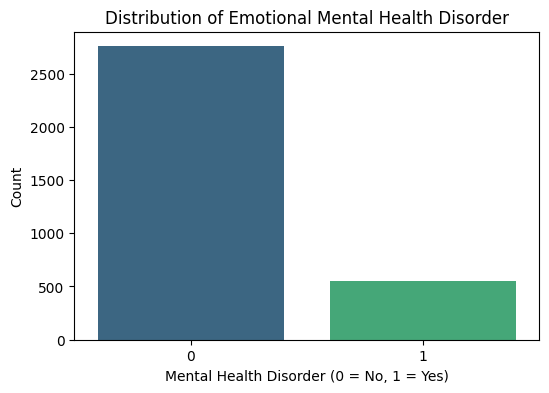

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(x="emotional_mental_health_disorder", data=df, palette="viridis")
plt.title("Distribution of Emotional Mental Health Disorder")
plt.xlabel("Mental Health Disorder (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

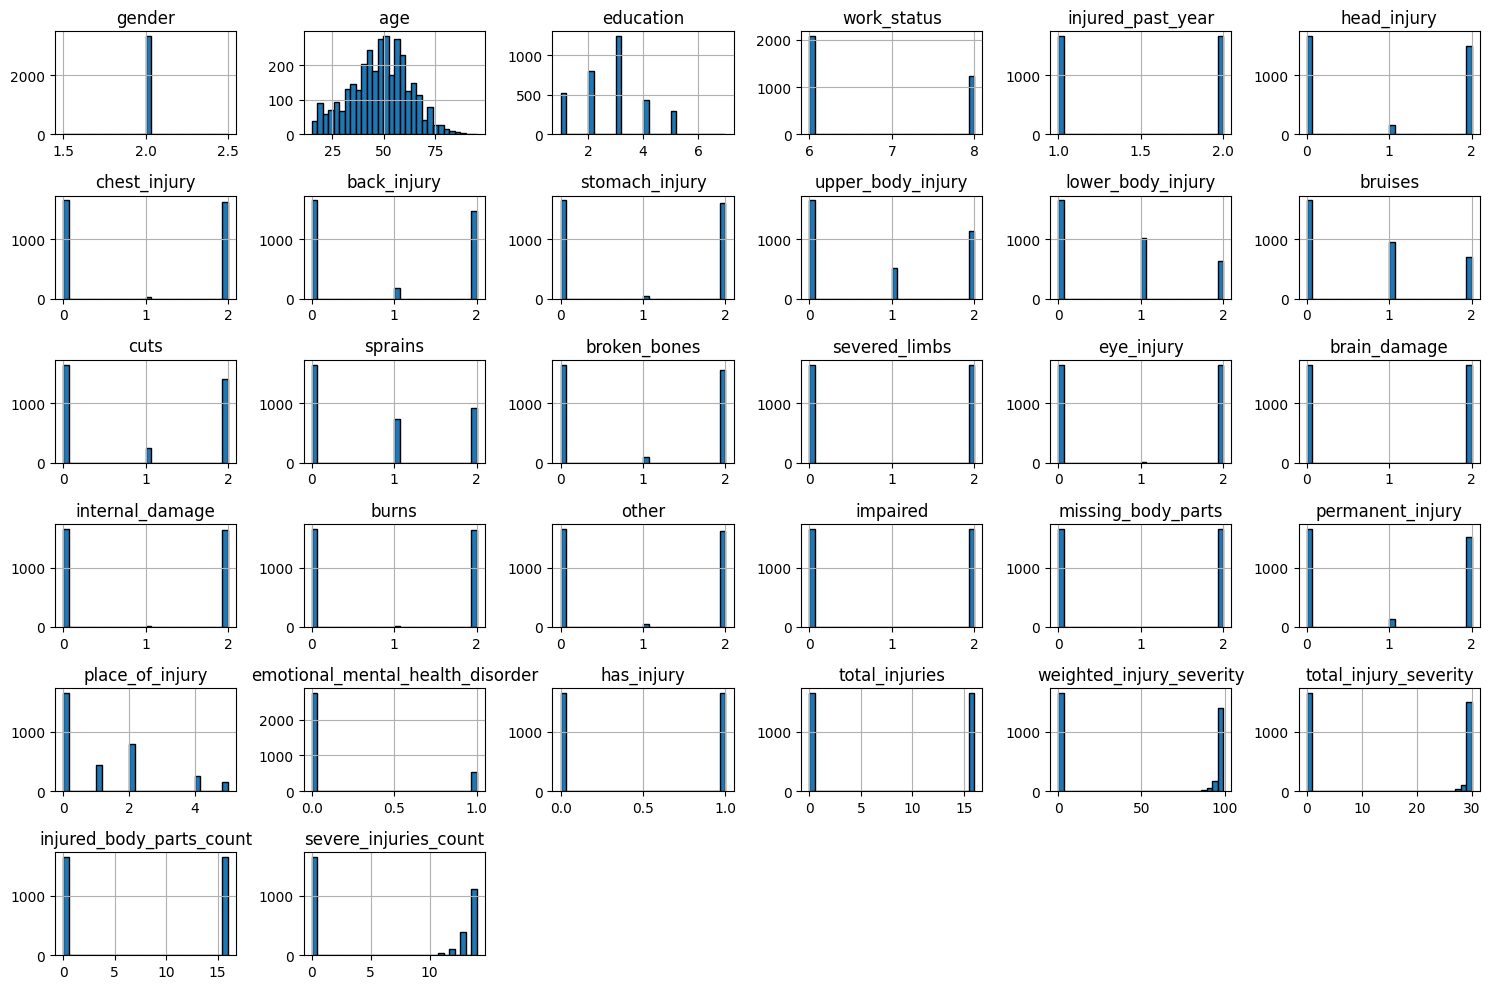

In [5]:
df.hist(figsize=(15, 10), bins=30, edgecolor='black')

plt.tight_layout()
plt.show()

In [6]:
# mental_health_counts = df.groupby("emotional_mental_health_disorder")[injury_cols].sum().T

# plt.figure(figsize=(10, 6))
# mental_health_counts.plot(kind="bar", stacked=True, figsize=(12, 6))
# plt.title("Injury Occurrence by Mental Health Disorder")
# plt.xlabel("Injury Type")
# plt.ylabel("Count")
# plt.legend(["No Disorder", "Has Disorder"])
# plt.show()

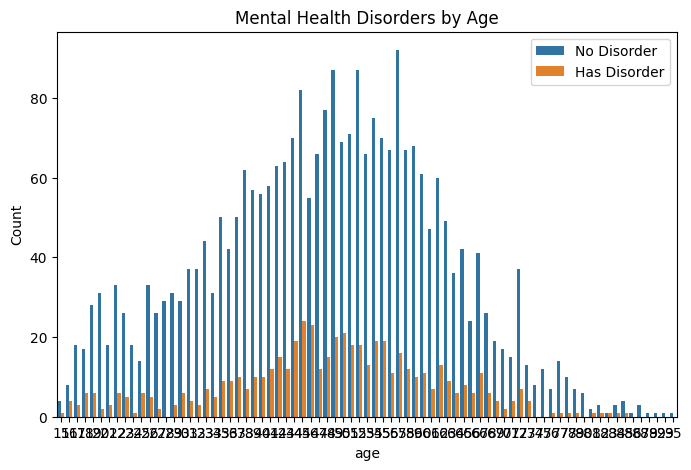

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(x="age", hue="emotional_mental_health_disorder", data=df)
plt.title("Mental Health Disorders by Age")
plt.ylabel("Count")
plt.legend(["No Disorder", "Has Disorder"])
plt.show()

In [8]:
# df.drop(columns=['idart', 'idrt','province', 'work_status', 'education', 'gender', 'age', 'place_of_injury'], inplace=True)
print(df.columns.tolist())

['gender', 'age', 'education', 'work_status', 'injured_past_year', 'head_injury', 'chest_injury', 'back_injury', 'stomach_injury', 'upper_body_injury', 'lower_body_injury', 'bruises', 'cuts', 'sprains', 'broken_bones', 'severed_limbs', 'eye_injury', 'brain_damage', 'internal_damage', 'burns', 'other', 'impaired', 'missing_body_parts', 'permanent_injury', 'place_of_injury', 'emotional_mental_health_disorder', 'has_injury', 'total_injuries', 'weighted_injury_severity', 'total_injury_severity', 'injured_body_parts_count', 'severe_injuries_count']


In [9]:
# plt.figure(figsize=(12, 8))
# sns.heatmap(df[binary_cols].corr(), cmap="coolwarm", annot=True, fmt=".2f")
# plt.title("Correlation Between Injuries and Mental Health Disorder")
# plt.show()

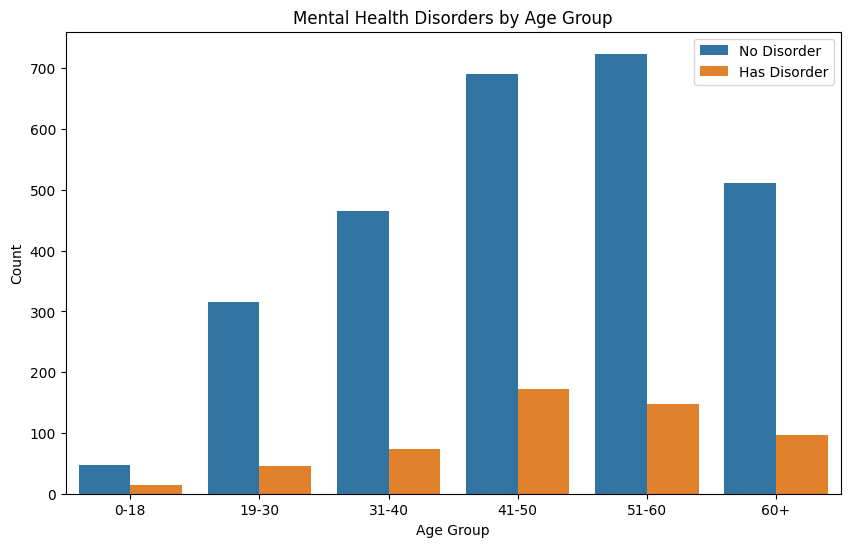

In [10]:
df["age_group"] = pd.cut(df["age"], bins=[0, 18, 30, 40, 50, 60, 100], labels=["0-18", "19-30", "31-40", "41-50", "51-60", "60+"])

plt.figure(figsize=(10, 6))
sns.countplot(x="age_group", hue="emotional_mental_health_disorder", data=df)
plt.title("Mental Health Disorders by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(["No Disorder", "Has Disorder"])
plt.show()

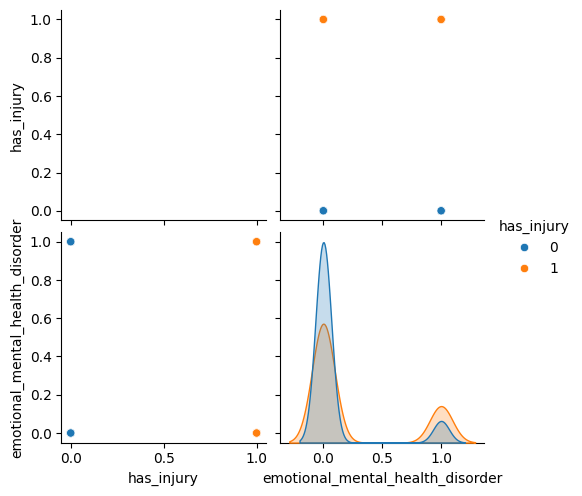

In [11]:
sns.pairplot(df, vars=['has_injury', 'emotional_mental_health_disorder'], hue='has_injury')

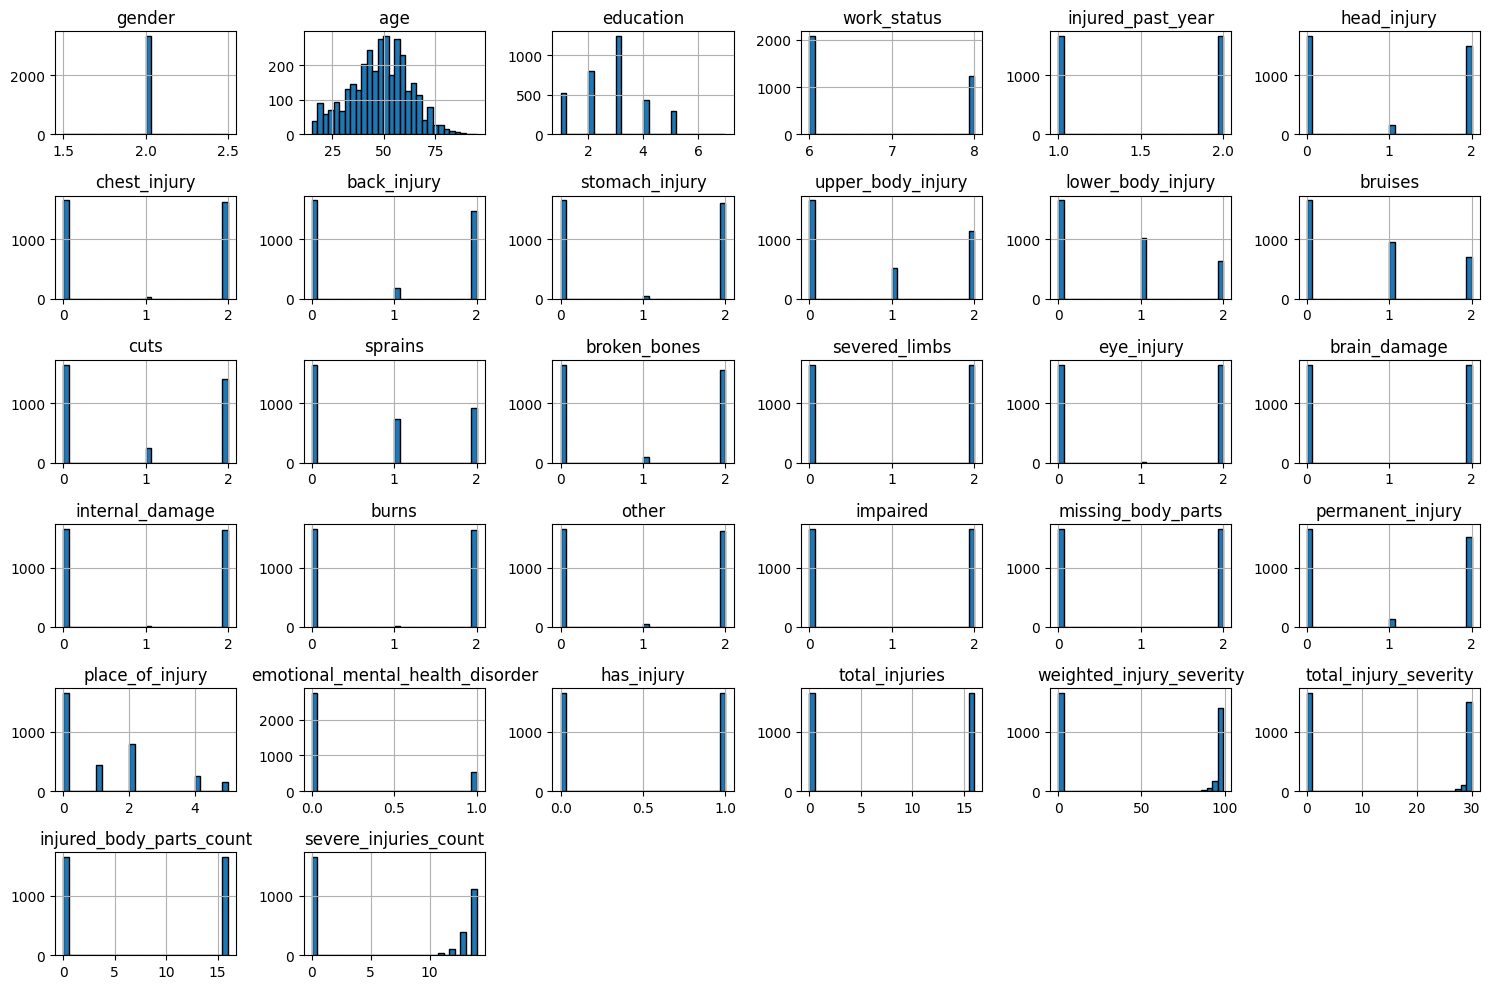

In [12]:
df.hist(figsize=(15, 10), bins=30, edgecolor='black')

plt.tight_layout()
plt.show()